# **Data Analysis with Pandas**

In this section we are going to learn how to analyze data in Python using the Pandas library. We start by importing the neccesary libraries, including pandas and numpy, among others.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Next, let us import the data.

In [17]:
mydata = pd.read_csv("shopping_dataset.csv")

# **Exploratory Data Analysis**

# Missing Values

This section examines the missing values in the data provided. 

In [18]:
mydata.isnull().sum()

Customer_ID            12
Age                    12
Gender                 12
City                   12
Income                 12
Total_Spend            12
Items_Purchased        12
Payment_Method         12
Membership_Status      12
Discount_Applied       12
Purchase_Date          12
Product_Category       12
Product_Rating         12
Time_Spent_Shopping    12
Store_Visited          12
Online_Order           12
Delivery_Time          12
Customer_Feedback      12
Loyalty_Points         12
Return_Status          12
dtype: int64

Now let us look at the data types for each of the variables.

In [19]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          108 non-null    object 
 1   Age                  108 non-null    float64
 2   Gender               108 non-null    object 
 3   City                 108 non-null    object 
 4   Income               108 non-null    float64
 5   Total_Spend          108 non-null    float64
 6   Items_Purchased      108 non-null    float64
 7   Payment_Method       108 non-null    object 
 8   Membership_Status    108 non-null    object 
 9   Discount_Applied     108 non-null    float64
 10  Purchase_Date        108 non-null    object 
 11  Product_Category     108 non-null    object 
 12  Product_Rating       108 non-null    float64
 13  Time_Spent_Shopping  108 non-null    float64
 14  Store_Visited        108 non-null    object 
 15  Online_Order         108 non-null    obj

We then so some summary statistics using the describe method.

In [20]:
mydata.describe()

,Age,Income,Total_Spend,Items_Purchased,Discount_Applied,Product_Rating,Time_Spent_Shopping,Delivery_Time,Loyalty_Points
count,108.000000,108.000000,108.000000,108.000000,108.0000,108.000000,108.000000,108.000000,108.000000
mean,43.351852,85695.018519,258.635741,10.037037,10.0000,2.981481,65.111296,7.787037,2457.500000
std,14.887940,36047.876116,141.810103,5.615276,7.2987,1.433781,34.223237,4.236139,1431.369885
min,18.000000,21150.000000,17.500000,1.000000,0.0000,1.000000,7.060000,1.000000,1.000000
25%,31.750000,52187.000000,137.815000,5.000000,5.0000,2.000000,37.597500,4.000000,1300.250000
50%,42.000000,90314.500000,275.895000,10.000000,10.0000,3.000000,67.180000,8.000000,2354.000000
75%,57.000000,114005.000000,367.917500,15.000000,15.0000,4.000000,93.425000,12.000000,3599.000000
max,69.000000,147813.000000,498.010000,19.000000,20.0000,5.000000,119.760000,14.000000,4957.000000


In [21]:
mydata.describe(include = "object")

,Customer_ID,Gender,City,Payment_Method,Membership_Status,Purchase_Date,Product_Category,Store_Visited,Online_Order,Customer_Feedback,Return_Status
count,108,108,108,108,108,108,108,108,108,108,108
unique,108,3,5,4,4,108,5,4,2,4,2
top,CUST_1,Other,Chicago,Debit Card,Silver,2023-01-01 00:00:00,Electronics,Mall,False,Good,Not Returned
freq,1,41,27,32,33,1,26,34,59,33,55


# **Data Visualization**

## Histogram of Customer Ages

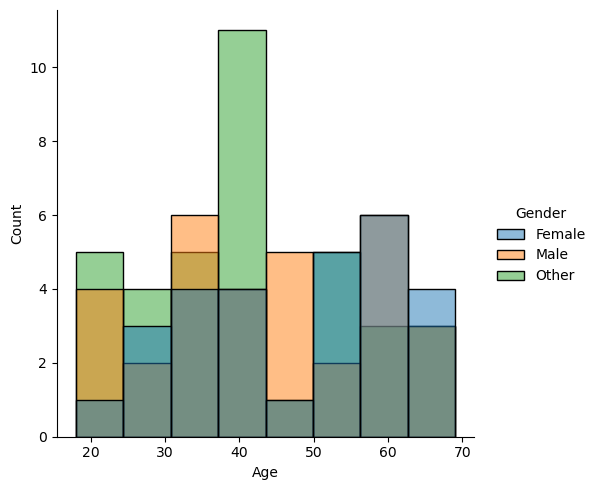

In [22]:
help(sns.displot)
sns.displot(x = "Age", data = mydata, hue = "Gender")

## A KDE Plot of Age

<Axes: xlabel='Age', ylabel='Density'>

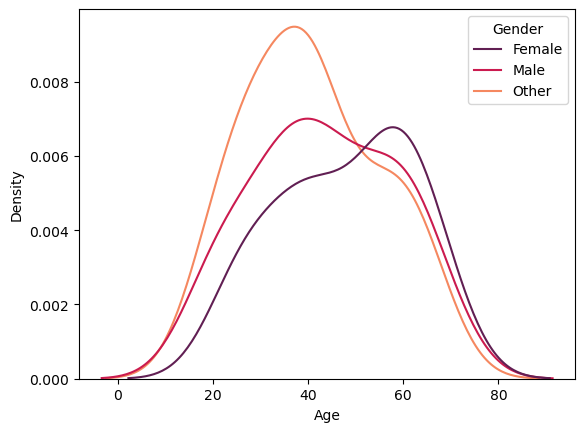

In [23]:
sns.kdeplot(x = "Age", data = mydata, hue = "Gender", palette="rocket")

## Bar Chart of Gender

<positron-console-cell-24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



<Axes: xlabel='Gender', ylabel='count'>

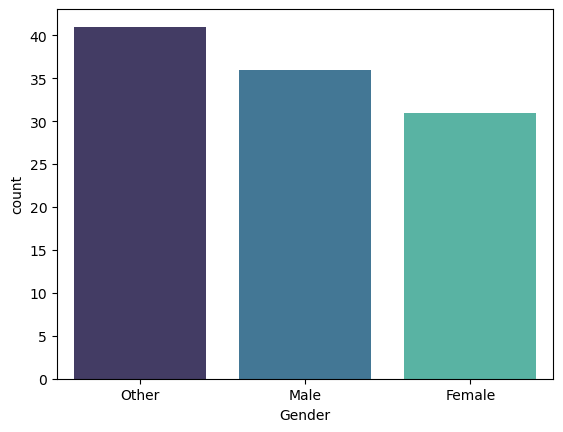

In [24]:
sns.barplot(mydata["Gender"].value_counts(), palette="mako")

## **Visulizing Missing Data**

<Axes: >

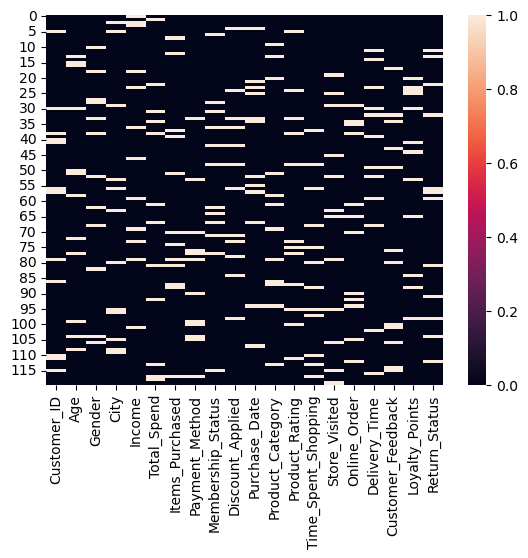

In [25]:
sns.heatmap(mydata.isnull())

# **Missing Data Imputation**

1. Drops rows or columns that have missing values.

In [26]:
#mydata.dropna()

2. Drop rows that have missing values for a given variable or variables

In [27]:
#mydata.dropna(axis = 0)

# Imputation
1. Mean Imputation: Replace missing values with the mean of the column.
mydata["Age"].fillna(mydata["Age"].mean(), inplace = True)
2. Median Imputation: Replace missing values with the median of the column.
mydata["Age"].fillna(mydata["Age"].median(), inplace = True)
3. Mode Imputation: Replace missing values with the mode of the column.
mydata["Age"].fillna(mydata["Age"].mode()[0], inplace = True)
4. MICE: Multiple imputation with chained equations

In [31]:
 mydata["Age"] = mydata["Age"].fillna(mydata["Age"].mean())